# INSTALL PACKAGE YANG DIBUTUHKAN

In [ ]:
#library untuk membaca dan menyimpan data dalam bentuk excel
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 11.7 MB/s 


In [ ]:
#library untuk mengubah kata dasar
!pip install Sastrawi

     |████████████████████████████████| 209 kB 21.0 MB/s 


In [ ]:
#library untuk mengatur karakter khusus
!pip install unidecode

     |████████████████████████████████| 235 kB 16.2 MB/s 


In [ ]:
#library untuk mempercepat proses stemming
!pip install swifter

     |████████████████████████████████| 633 kB 21.4 MB/s 
     |████████████████████████████████| 280 kB 52.5 MB/s 
     |████████████████████████████████| 134 kB 59.2 MB/s 
  Created wheel for swifter: filename=swifter-1.1.2-py3-none-any.whl size=13210 sha256=e9413e2b18b47c286257cce3958d54439c2cc8a1cdedffa0745cca241f2c4ba2
  Stored in directory: /root/.cache/pip/wheels/79/7d/d1/9c1daa3e18ead25b4b641491851977b382f4b392a9a32ffc38
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [6]:
!pip install gensim

# LIBRARY YANG DIBUTUHKAN

In [ ]:
import xlsxwriter
import pandas as pd
import numpy as np
import swifter
import re
import unidecode
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# MEMBACA DATA HASIL PRE-PROCESSING

In [2]:
#menyambungkan file ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scrapeddata = pd.read_csv("/content/drive/My Drive/TA/hasilpreprocessing.csv")
scrapeddata

,review,rating,versi,date
0,"Setelah update, sertifikat malah hilang padaha...",5,4.1.0,2022-02-15 15:09:48
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,4.0.8,2022-02-14 14:24:24
2,masalah mengatur tanggal nya bikin kesel😡,1,4.1.0,2022-02-14 14:05:08
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,4.1.0,2022-02-14 14:05:01
4,Ngikut aja bos,5,4.1.0,2022-02-14 14:04:23
...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,3.4.4,2021-09-03 04:14:27
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,3.4.4,2021-09-03 04:09:43
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,3.4.4,2021-09-03 04:08:17
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,3.4.4,2021-09-03 04:05:18


In [ ]:
#menghapus kolom yang tidak dibutuhkan
df = scrapeddata.drop(scrapeddata.columns[[2, 3]], axis=1)
df

,review,rating
0,"Setelah update, sertifikat malah hilang padaha...",5
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5
2,masalah mengatur tanggal nya bikin kesel😡,1
3,Cukup pake no nik saja apakah sudah vaksin tid...,4
4,Ngikut aja bos,5
...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1


# TEXT MINING

In [ ]:
def cleaningText(review): #proses konversi teks menjadi bentuk standar 
    review = re.sub(r'[0-9]+', '', review) #menghapus angka
    review = re.sub(r'\s+',' ', str(review)) #menghapus spasi/karakter kosong
    review = re.sub(r"http\S+", '', review) #menghapus link
    review = re.sub("[^a-zA-Z0-9]"," ",review) #menghapus karakter khusus

    review = review.encode('ascii', 'ignore').decode('utf-8') #menghapus karakter beraksen
    review = review.translate(str.maketrans('', '', string.punctuation)) #menghapus tanda baca
    return review

df['cleaning'] = df['review'].apply(lambda x: cleaningText(x))
df

,review,rating,cleaning
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...
4,Ngikut aja bos,5,Ngikut aja bos
...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...


In [ ]:
def casefoldingText(review): #mengubah semua text menjadi huruf kecil 
    review = review.lower() 
    return review

df['casefolding'] = df['cleaning'].apply(lambda x: casefoldingText(x))
df

,review,rating,cleaning,casefolding
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos
...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...


In [ ]:
def tokenizingText(review): #proses memisahkan teks menjadi potongan token 
    review = word_tokenize(review) 
    return review
df['tokenizing'] = df['casefolding'].apply(lambda x: tokenizingText(x))
df

,review,rating,cleaning,casefolding,tokenizing
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"[setelah, update, sertifikat, malah, hilang, p..."
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"[saya, sudah, divaksin, kali, alhamdulillah, s..."
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"[masalah, mengatur, tanggal, nya, bikin, kesel]"
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"[cukup, pake, no, nik, saja, apakah, sudah, va..."
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"[ngikut, aja, bos]"
...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"[tolong, dong, klo, bikin, sertifikat, vaksin,..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"[jadi, bingung, sama, aplikasi, ini, saya, sdh..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"[aplikasinya, bagus, tapi, sayang, untuk, scan..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"[sudah, di, vaksin, sudah, masukin, data, tapi..."


In [ ]:
#melihat jumlah kata dari hasil tokenizing
from collections import Counter
cnt = Counter()
for review in df["tokenizing"].values:
    for word in review:
        cnt[word] += 1
        
cnt

Counter({'setelah': 2857,
         'update': 3616,
         'sertifikat': 13579,
         'malah': 4702,
         'hilang': 929,
         'padahal': 6158,
         'kemarin': 406,
         'sebelum': 363,
         'ada': 10564,
         'saya': 26168,
         'sudah': 14754,
         'divaksin': 531,
         'kali': 3733,
         'alhamdulillah': 481,
         'sehat': 514,
         'terima': 1398,
         'kasih': 2491,
         'peduli': 2887,
         'lindungi': 2613,
         'masalah': 710,
         'mengatur': 22,
         'tanggal': 3656,
         'nya': 10766,
         'bikin': 2607,
         'kesel': 183,
         'cukup': 534,
         'pake': 1691,
         'no': 1712,
         'nik': 3461,
         'saja': 1993,
         'apakah': 500,
         'vaksin': 24292,
         'tidaknya': 5,
         'kalo': 1918,
         'mengingat': 42,
         'suka': 521,
         'lupa': 221,
         'ngikut': 5,
         'aja': 5185,
         'bos': 131,
         'kapan': 246,
      

In [ ]:
#membenarkan bahasa non formal menjadi formal
slank_word_dict = {
    "min" : "admin", "gmembantu" : "tidak membantu", "sangatembantu" : "sangat membantu", "samsek" : "sama sekali", "piee" : "bagaimana",
    "iki" : "ini", "taiii" : "tinja", "hadeeeeeeuuuuuuhhhhh" : "aduh", "cincong" : "banyak bicara", "abisssh" : "habis", "oedulilindungi" : "pedullilindungi",
    "pl" : "pedulilindungi", "woyyy" : "woy", "sangaaaaatttt" : "sangat", "parahhhhh" : "parah", "sekaliii" : "sekali", "harusssss" : "harus", 
    "jeeeleeeeeeeeeeekkkkkkk" : "jelek", "bangetttttt" : "banget", "bissaaa" : "bisa", "selalupakaimasker" : "selalu pakai masker", "cucitang" : "cuci tangan",
    "monghind ri" : "menghindari", "kerimun" : "keramaian", "jagajata" : "jaga jarak", "terbaikkkkkkkkk" : "terbaik", "belajarlagi" : "belajar lagi",
    "sukaaaaa" : "suka", "herannnn" : "heran", "limapuluhan" : "lima puluhan", "barutau" : "baru tau", "baguus" : "bagus", "cepattttt" : "cepat", 
    "sangaaaaatttt" : "sangat", "daaaaah" : "sudah", "abdett" : "update", "suliiit" : "sulit", "ruweettt" : "ribet", "kentaangg" : "jelek", "baeee" : "baik",
    "bukanmain" : "bukan main", "hadeuuhhhhhh" : "aduh", "hadahhhhhh" : "aduh", "hadahhhhhhhhhhh" : "aduh", "programpedulilindungi" : "program peduli lindungi", 
    "teroossss" : "terus", "tarjuga" : "nanti juga", "jelaaaaaaasssssss" : "jelas", "periksaaaa" : "periksa", "bisaaaaaaaaaaa" : "bisa", 
    "palpalepalpalee" : "bercanda", "parahmen" : "parah kawan", "hadehhhhhhhhhhh" : "aduh", "yaaghhh" : "yah", "bocorrrrrr" : "bocor", "maleh" : "kawan",
    "gilakk" : "gila", "deeech" : "deh", "haduuuuuuuuh" : "aduh", "payaaaahhh" : "payah", "apikkkkkk" : "bagus", "mntaaap" : "mantap", "ampyuuuun" : "ampun",
    "pwooolll" : "banget", "bansadddddd" : "bangsat", "satttttt" : "bangsat", "ngabrettt" :"cepat",  "eeeerrrrrrooooor" : "error", 
    "tolooooooonnnnnngggg" : "tolong", "didownloadtapi" : "didownload tapi", "luarrrrrrrrrrr" : "luar", "toolong" : "tolong", "lemooooott" : "lambat", 
    "bloooookkk" : "goblok", "pakkkkkk" : "bapak", "payaaaaaahhhhhhh" : "payah", "kacauuuuuuuuuuuuuuu" : "kacau", "payaaaah" : "payah", "luaaarrr" : "luar",
    "laaaaahhhh" : "lah", "tolongpencerahannya" : "tolong pencerahannya", "uuuuh" : "aduh", "terhusus" : "terkhusus", "amatttttttt" : "banget", 
    "pulakk" : "pula", "lieurr" : "pusing", "dipaksasehatdinegarayangsakit" : "dipaksa sehat di negara yang sakit", "taaaiiii" : "tinja", "baruuuk" : "baru",
    "yakaaliii" : "ya kali", "yy" : "ya", "yibujjiiiiiiiijjbibjijijbiibibbobbnnbbvxzvbbiiiihhxxvbbbh" : "tidak jelas", 
    "ubvbibiibibhbbbbbiiiibbiiiibbbjbbbibbbibbbhiiibibb" : "tidak jelas", "p" : "peduli", "l" : "lindungi", "pliissss" : "tolong", "lahhhh" : "lah", "haduuuuh" : "aduh", 
    "joss" : "mantap", "jelasss" : "jelas", "terbaikkkkkkkkk" : "terbaik", "perdulilindungi" : "pedulilindungi", "terbaikkkkkkk" : "terbaik", "piye" : "bagaimana", 
    "berulangkali" : "berulang kali", "ngeleg" : "lambat", "kampettt" : "kampret", "iklannnnn" : "iklan", "wadukkkk" : "pembuangan", "sangaaaaaat" : "sangat", 
    "cepattttt" : "cepat", "siiipp" : "oke", "mantuull" : "mantap betul", "bbodooh" : "bodoh", "maasa" : "masa", "bos" : "atasan", "vhubjibjhijvy" : "tidak jelas",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [ ]:
normalizad_word = pd.read_csv("/content/drive/My Drive/TA/kamus_alay.csv")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['normalized'] = df['tokenizing'].apply(normalized_term).apply(slank_normalized_term)
df

,review,rating,cleaning,casefolding,tokenizing,normalized
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"[setelah, update, sertifikat, malah, hilang, p...","[setelah, update, sertifikat, malah, hilang, p..."
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"[saya, sudah, divaksin, kali, alhamdulillah, s...","[saya, sudah, divaksin, kali, alhamdulillah, s..."
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"[masalah, mengatur, tanggal, nya, bikin, kesel]","[masalah, mengatur, tanggal, nya, bikin, kesel]"
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"[cukup, pake, no, nik, saja, apakah, sudah, va...","[cukup, pakai, nomor, nik, saja, apakah, sudah..."
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"[ngikut, aja, bos]","[ngikut, saja, atasan]"
...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"[tolong, dong, klo, bikin, sertifikat, vaksin,...","[tolong, dong, kalo, bikin, sertifikat, vaksin..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"[jadi, bingung, sama, aplikasi, ini, saya, sdh...","[jadi, bingung, sama, aplikasi, ini, saya, sud..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, tapi, sayang, untuk, scan..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"[sudah, di, vaksin, sudah, masukin, data, tapi...","[sudah, di, vaksin, sudah, memasukkan, data, t..."


In [ ]:
def filteringText(review): #menghapus kata-kata yang memiliki arti rendah
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for word in review:
        if word not in listStopwords:
            filtered.append(word)
    review = filtered 
    return review

df['filtering'] = df['normalized'].apply(lambda x: filteringText(x))
df

,review,rating,cleaning,casefolding,tokenizing,normalized,filtering
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"[setelah, update, sertifikat, malah, hilang, p...","[setelah, update, sertifikat, malah, hilang, p...","[update, sertifikat, hilang, kemarin, update]"
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"[saya, sudah, divaksin, kali, alhamdulillah, s...","[saya, sudah, divaksin, kali, alhamdulillah, s...","[divaksin, kali, alhamdulillah, sehat, terima,..."
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"[masalah, mengatur, tanggal, nya, bikin, kesel]","[masalah, mengatur, tanggal, nya, bikin, kesel]","[mengatur, tanggal, nya, bikin, kesel]"
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"[cukup, pake, no, nik, saja, apakah, sudah, va...","[cukup, pakai, nomor, nik, saja, apakah, sudah...","[pakai, nomor, nik, vaksin, tidaknya, kalo, ta..."
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"[ngikut, aja, bos]","[ngikut, saja, atasan]","[ngikut, atasan]"
...,...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"[tolong, dong, klo, bikin, sertifikat, vaksin,...","[tolong, dong, kalo, bikin, sertifikat, vaksin...","[tolong, kalo, bikin, sertifikat, vaksin, tang..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"[jadi, bingung, sama, aplikasi, ini, saya, sdh...","[jadi, bingung, sama, aplikasi, ini, saya, sud...","[bingung, aplikasi, vaksin, sertifikatnya, bed..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, sayang, scan, barcodenya,..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"[sudah, di, vaksin, sudah, masukin, data, tapi...","[sudah, di, vaksin, sudah, memasukkan, data, t...","[vaksin, memasukkan, data, ngga, sertifikat, nya]"


In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['filtering']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Stemmed'] = df['filtering'].swifter.apply(get_stemmed_term)

Streaming output truncated to the last 5000 lines.
kerjalah : kerja
july : july
giving : giving
burikkkkkkk : burikkkkkkk
vaksinasiku : vaksinasi
nungguh : nungguh
calendar : calendar
surus : surus
prnha : prnha
comentar : comentar
bannyak : bannyak
lokout : lokout
pengunjungx : pengunjungx
udch : udch
prksa : prksa
sch : sch
msakah : msakah
solusix : solusix
dipabrik : pabrik
teruuuuuss : teruuuuuss
ssrtifikat : ssrtifikat
pendafran : pendafran
put : put
selemah : lemah
bangsanya : bangsa
peduliliindungi : peduliliindungi
diggnakan : diggnakan
pwmberitahuan : pwmberitahuan
pertamax : pertamax
sblmnnya : sblmnnya
dibbrp : dibbrp
dipintu : pintu
diposisi : posisi
kntollllll : kntollllll
fcksin : fcksin
custemer : custemer
kepolsek : kepolsek
yaampun : yaampun
birokrasinya : birokrasi
gregetan : gregetan
aink : aink
keihklasan : keihklasan
drpda : drpda
lali : lali
huhfhhh : huhfhhh
yan : yan
sifatnya : sifat
marshal : marshal
payload : payload
diopersikan : diopersikan
banyk : banyk
dia

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
df

,review,rating,cleaning,casefolding,tokenizing,normalized,filtering,Stemmed
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"[setelah, update, sertifikat, malah, hilang, p...","[setelah, update, sertifikat, malah, hilang, p...","[update, sertifikat, hilang, kemarin, update]","[update, sertifikat, hilang, kemarin, update]"
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"[saya, sudah, divaksin, kali, alhamdulillah, s...","[saya, sudah, divaksin, kali, alhamdulillah, s...","[divaksin, kali, alhamdulillah, sehat, terima,...","[vaksin, kali, alhamdulillah, sehat, terima, k..."
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"[masalah, mengatur, tanggal, nya, bikin, kesel]","[masalah, mengatur, tanggal, nya, bikin, kesel]","[mengatur, tanggal, nya, bikin, kesel]","[atur, tanggal, nya, bikin, kesel]"
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"[cukup, pake, no, nik, saja, apakah, sudah, va...","[cukup, pakai, nomor, nik, saja, apakah, sudah...","[pakai, nomor, nik, vaksin, tidaknya, kalo, ta...","[pakai, nomor, nik, vaksin, tidak, kalo, tangg..."
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"[ngikut, aja, bos]","[ngikut, saja, atasan]","[ngikut, atasan]","[ngikut, atas]"
...,...,...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"[tolong, dong, klo, bikin, sertifikat, vaksin,...","[tolong, dong, kalo, bikin, sertifikat, vaksin...","[tolong, kalo, bikin, sertifikat, vaksin, tang...","[tolong, kalo, bikin, sertifikat, vaksin, tang..."
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"[jadi, bingung, sama, aplikasi, ini, saya, sdh...","[jadi, bingung, sama, aplikasi, ini, saya, sud...","[bingung, aplikasi, vaksin, sertifikatnya, bed...","[bingung, aplikasi, vaksin, sertifikat, beda, ..."
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, sayang, scan, barcodenya,...","[aplikasi, bagus, sayang, scan, barcodenya, ra..."
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"[sudah, di, vaksin, sudah, masukin, data, tapi...","[sudah, di, vaksin, sudah, memasukkan, data, t...","[vaksin, memasukkan, data, ngga, sertifikat, nya]","[vaksin, masuk, data, ngga, sertifikat, nya]"


In [ ]:
df["review_clean"] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,review,rating,cleaning,casefolding,tokenizing,normalized,filtering,Stemmed,review_clean
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"[setelah, update, sertifikat, malah, hilang, p...","[setelah, update, sertifikat, malah, hilang, p...","[update, sertifikat, hilang, kemarin, update]","[update, sertifikat, hilang, kemarin, update]",update sertifikat hilang kemarin update
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"[saya, sudah, divaksin, kali, alhamdulillah, s...","[saya, sudah, divaksin, kali, alhamdulillah, s...","[divaksin, kali, alhamdulillah, sehat, terima,...","[vaksin, kali, alhamdulillah, sehat, terima, k...",vaksin kali alhamdulillah sehat terima kasih p...
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"[masalah, mengatur, tanggal, nya, bikin, kesel]","[masalah, mengatur, tanggal, nya, bikin, kesel]","[mengatur, tanggal, nya, bikin, kesel]","[atur, tanggal, nya, bikin, kesel]",atur tanggal nya bikin kesel
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"[cukup, pake, no, nik, saja, apakah, sudah, va...","[cukup, pakai, nomor, nik, saja, apakah, sudah...","[pakai, nomor, nik, vaksin, tidaknya, kalo, ta...","[pakai, nomor, nik, vaksin, tidak, kalo, tangg...",pakai nomor nik vaksin tidak kalo tanggal vaks...
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"[ngikut, aja, bos]","[ngikut, saja, atasan]","[ngikut, atasan]","[ngikut, atas]",ngikut atas
...,...,...,...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"[tolong, dong, klo, bikin, sertifikat, vaksin,...","[tolong, dong, kalo, bikin, sertifikat, vaksin...","[tolong, kalo, bikin, sertifikat, vaksin, tang...","[tolong, kalo, bikin, sertifikat, vaksin, tang...",tolong kalo bikin sertifikat vaksin tanggal la...
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"[jadi, bingung, sama, aplikasi, ini, saya, sdh...","[jadi, bingung, sama, aplikasi, ini, saya, sud...","[bingung, aplikasi, vaksin, sertifikatnya, bed...","[bingung, aplikasi, vaksin, sertifikat, beda, ...",bingung aplikasi vaksin sertifikat beda vaksin...
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, tapi, sayang, untuk, scan...","[aplikasinya, bagus, sayang, scan, barcodenya,...","[aplikasi, bagus, sayang, scan, barcodenya, ra...",aplikasi bagus sayang scan barcodenya radius s...
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"[sudah, di, vaksin, sudah, masukin, data, tapi...","[sudah, di, vaksin, sudah, memasukkan, data, t...","[vaksin, memasukkan, data, ngga, sertifikat, nya]","[vaksin, masuk, data, ngga, sertifikat, nya]",vaksin masuk data ngga sertifikat nya


# MENYIMPAN DATA HASIL TEXT MINING

In [ ]:
#df.to_csv("/content/drive/My Drive/TA/textmining.csv", index=False)

In [ ]:
#df.to_excel("/content/drive/My Drive/TA/textmining.xlsx", index=False)

# PELABELAN

In [ ]:
analisa = pd.read_csv("/content/drive/My Drive/TA/textmining.csv")
analisa

,review,rating,cleaning,casefolding,tokenizing,normalized,filtering,Stemmed,review_clean
0,"Setelah update, sertifikat malah hilang padaha...",5,Setelah update sertifikat malah hilang padaha...,setelah update sertifikat malah hilang padaha...,"['setelah', 'update', 'sertifikat', 'malah', '...","['setelah', 'update', 'sertifikat', 'malah', '...","['update', 'sertifikat', 'hilang', 'kemarin', ...","['update', 'sertifikat', 'hilang', 'kemarin', ...",update sertifikat hilang kemarin update
1,saya sudah divaksin 3 kali alhamdulillah sehat...,5,saya sudah divaksin kali alhamdulillah sehat t...,saya sudah divaksin kali alhamdulillah sehat t...,"['saya', 'sudah', 'divaksin', 'kali', 'alhamdu...","['saya', 'sudah', 'divaksin', 'kali', 'alhamdu...","['divaksin', 'kali', 'alhamdulillah', 'sehat',...","['vaksin', 'kali', 'alhamdulillah', 'sehat', '...",vaksin kali alhamdulillah sehat terima kasih p...
2,masalah mengatur tanggal nya bikin kesel😡,1,masalah mengatur tanggal nya bikin kesel,masalah mengatur tanggal nya bikin kesel,"['masalah', 'mengatur', 'tanggal', 'nya', 'bik...","['masalah', 'mengatur', 'tanggal', 'nya', 'bik...","['mengatur', 'tanggal', 'nya', 'bikin', 'kesel']","['atur', 'tanggal', 'nya', 'bikin', 'kesel']",atur tanggal nya bikin kesel
3,Cukup pake no nik saja apakah sudah vaksin tid...,4,Cukup pake no nik saja apakah sudah vaksin tid...,cukup pake no nik saja apakah sudah vaksin tid...,"['cukup', 'pake', 'no', 'nik', 'saja', 'apakah...","['cukup', 'pakai', 'nomor', 'nik', 'saja', 'ap...","['pakai', 'nomor', 'nik', 'vaksin', 'tidaknya'...","['pakai', 'nomor', 'nik', 'vaksin', 'tidak', '...",pakai nomor nik vaksin tidak kalo tanggal vaks...
4,Ngikut aja bos,5,Ngikut aja bos,ngikut aja bos,"['ngikut', 'aja', 'bos']","['ngikut', 'saja', 'atasan']","['ngikut', 'atasan']","['ngikut', 'atas']",ngikut atas
...,...,...,...,...,...,...,...,...,...
49995,Tolong dong klo bikin sertifikat vaksin .tangg...,5,Tolong dong klo bikin sertifikat vaksin tangg...,tolong dong klo bikin sertifikat vaksin tangg...,"['tolong', 'dong', 'klo', 'bikin', 'sertifikat...","['tolong', 'dong', 'kalo', 'bikin', 'sertifika...","['tolong', 'kalo', 'bikin', 'sertifikat', 'vak...","['tolong', 'kalo', 'bikin', 'sertifikat', 'vak...",tolong kalo bikin sertifikat vaksin tanggal la...
49996,"Jadi bingung sama aplikasi ini , saya sdh 2 ka...",2,Jadi bingung sama aplikasi ini saya sdh kalu...,jadi bingung sama aplikasi ini saya sdh kalu...,"['jadi', 'bingung', 'sama', 'aplikasi', 'ini',...","['jadi', 'bingung', 'sama', 'aplikasi', 'ini',...","['bingung', 'aplikasi', 'vaksin', 'sertifikatn...","['bingung', 'aplikasi', 'vaksin', 'sertifikat'...",bingung aplikasi vaksin sertifikat beda vaksin...
49997,Aplikasinya bagus...tapi sayang untuk scan bar...,3,Aplikasinya bagus tapi sayang untuk scan bar...,aplikasinya bagus tapi sayang untuk scan bar...,"['aplikasinya', 'bagus', 'tapi', 'sayang', 'un...","['aplikasinya', 'bagus', 'tapi', 'sayang', 'un...","['aplikasinya', 'bagus', 'sayang', 'scan', 'ba...","['aplikasi', 'bagus', 'sayang', 'scan', 'barco...",aplikasi bagus sayang scan barcodenya radius s...
49998,"Sudah di vaksin, sudah masukin data, tapi GA a...",1,Sudah di vaksin sudah masukin data tapi GA a...,sudah di vaksin sudah masukin data tapi ga a...,"['sudah', 'di', 'vaksin', 'sudah', 'masukin', ...","['sudah', 'di', 'vaksin', 'sudah', 'memasukkan...","['vaksin', 'memasukkan', 'data', 'ngga', 'sert...","['vaksin', 'masuk', 'data', 'ngga', 'sertifika...",vaksin masuk data ngga sertifikat nya


In [ ]:
#menghapus kolom yang tidak dibutuhkan
df_analisa = analisa.drop(analisa.columns[[0, 2, 3, 4, 5, 6, 7]], axis=1)
df_analisa

,rating,review_clean
0,5,update sertifikat hilang kemarin update
1,5,vaksin kali alhamdulillah sehat terima kasih p...
2,1,atur tanggal nya bikin kesel
3,4,pakai nomor nik vaksin tidak kalo tanggal vaks...
4,5,ngikut atas
...,...,...
49995,5,tolong kalo bikin sertifikat vaksin tanggal la...
49996,2,bingung aplikasi vaksin sertifikat beda vaksin...
49997,3,aplikasi bagus sayang scan barcodenya radius s...
49998,1,vaksin masuk data ngga sertifikat nya


In [ ]:
df_analisa.isna().sum()

rating            0
review_clean    128
dtype: int64

In [ ]:
df_analisa.dropna(inplace=True)
df_analisa.isnull().sum()

rating          0
review_clean    0
dtype: int64

In [ ]:
df_analisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49872 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        49872 non-null  int64 
 1   review_clean  49872 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
label = []
for index, row in df_analisa.iterrows():
    if row["rating"] == 5 or row["rating"] == 4:
        label.append("Positif")
    elif row["rating"] == 3:
        label.append("Netral")
    elif row["rating"] == 2 or row["rating"] == 1:
        label.append("Negatif")
    else:
        label.append(0)


df_analisa["label"] = label
df_analisa

,review_clean,rating,label
0,update sertifikat hilang kemarin update,5,Positif
1,vaksin kali alhamdulillah sehat terima kasih p...,5,Positif
2,atur tanggal nya bikin kesel,1,Negatif
3,pakai nomor nik vaksin tidak kalo tanggal vaks...,4,Positif
4,ngikut atas,5,Positif
...,...,...,...
49995,tolong kalo bikin sertifikat vaksin tanggal la...,5,Positif
49996,bingung aplikasi vaksin sertifikat beda vaksin...,2,Negatif
49997,aplikasi bagus sayang scan barcodenya radius s...,3,Netral
49998,vaksin masuk data ngga sertifikat nya,1,Negatif


In [ ]:
df_analisa = df_analisa.reindex(['review_clean','rating','label'], axis=1)
df_analisa

,review_clean,rating,label
0,update sertifikat hilang kemarin update,5,Positif
1,vaksin kali alhamdulillah sehat terima kasih p...,5,Positif
2,atur tanggal nya bikin kesel,1,Negatif
3,pakai nomor nik vaksin tidak kalo tanggal vaks...,4,Positif
4,ngikut atas,5,Positif
...,...,...,...
49995,tolong kalo bikin sertifikat vaksin tanggal la...,5,Positif
49996,bingung aplikasi vaksin sertifikat beda vaksin...,2,Negatif
49997,aplikasi bagus sayang scan barcodenya radius s...,3,Netral
49998,vaksin masuk data ngga sertifikat nya,1,Negatif


# MENYIMPAN DATA HASIL PELABELAN

In [ ]:
df_analisa.to_csv("/content/drive/My Drive/TA/pelabelan.csv", index=False)

In [ ]:
df_analisa.to_excel("/content/drive/My Drive/TA/pelabelan.xlsx", index=False)

# EDA SETELAH PROCESSING

In [ ]:
import collections
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
df_analisa['rating'].value_counts()

1    24992
5    12673
2     4900
3     4273
4     3034
Name: rating, dtype: int64

Text(0.5, 1.0, 'Total Rating Pengguna PeduliLindungi')

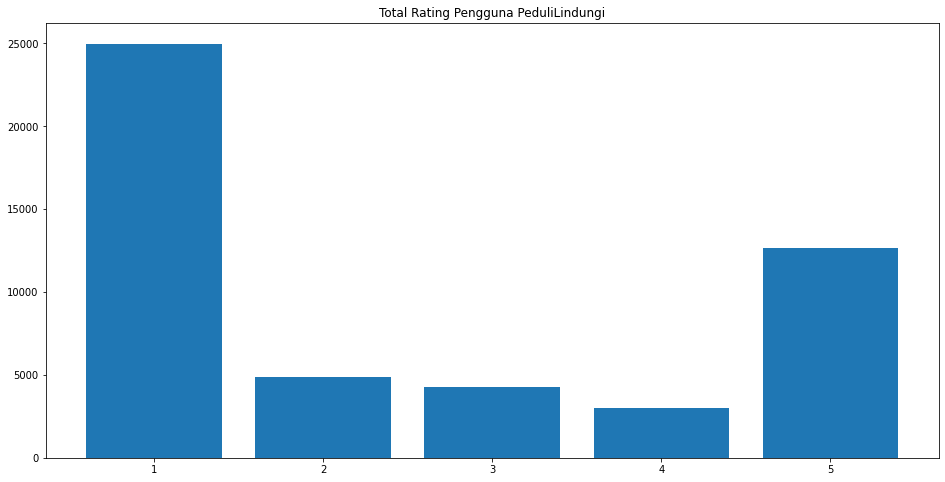

In [ ]:
rating_cnt = Counter(df_analisa.rating)

plt.figure(figsize=(16,8))
plt.bar(rating_cnt.keys(), rating_cnt.values())
plt.title("Total Rating Pengguna PeduliLindungi")

In [ ]:
df_analisa['label'].value_counts()

Negatif    29892
Positif    15707
Netral      4273
Name: label, dtype: int64

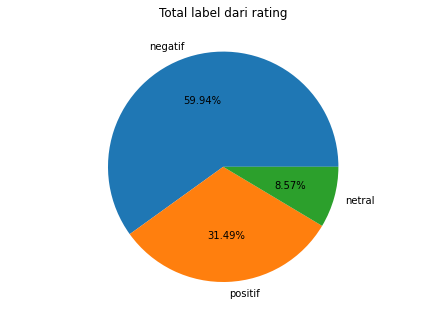

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
ability = ['negatif', 'positif', 'netral']
score = [29892, 15707, 4273]
ax.pie(score, labels = ability, autopct='%1.2f%%')

plt.title('Total label dari rating')
plt.show()

# WORDS CLOUD

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [ ]:
pos_comments = list(df_analisa[df_analisa['label']=='Positif']['review_clean'].values)
positive_words = ' '.join(pos_comments).split(' ')
positive_words = pd.DataFrame(positive_words,columns=['words'])['words'].value_counts()[1:]

neu_comments = list(df_analisa[df_analisa['label']=='Netral']['review_clean'].values)
neutral_words = ' '.join(neu_comments).split(' ')
neutral_words = pd.DataFrame(neutral_words,columns=['words'])['words'].value_counts()[1:]

neg_comments = list(df_analisa[df_analisa['label']=='Negatif']['review_clean'].values)
negative_words = ' '.join(neg_comments).split(' ')
negative_words = pd.DataFrame(negative_words,columns=['words'])['words'].value_counts()[1:]

In [ ]:
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
positive_wc = positive_wc.generate_from_frequencies(positive_words)


neutral_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Greys', background_color='white', max_words=50)
neutral_wc = neutral_wc.generate_from_frequencies(neutral_words)


negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Reds_r', background_color='white', max_words=50)
negative_wc = negative_wc.generate_from_frequencies(negative_words)


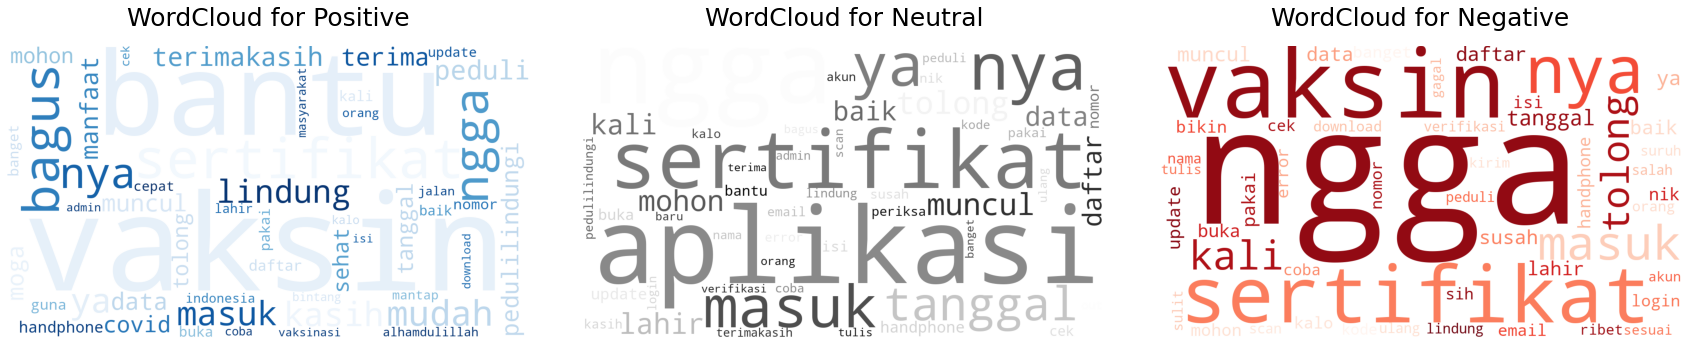

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 30))

axs[0].set_title('WordCloud for Positive', size=25, pad=20)
axs[0].imshow(positive_wc)
axs[0].axis('off')

axs[1].set_title('WordCloud for Neutral', size=25, pad=20)
axs[1].imshow(neutral_wc)
axs[1].axis('off')

axs[2].set_title('WordCloud for Negative', size=25, pad=20)
axs[2].imshow(negative_wc)
axs[2].axis('off');

fig.subplots_adjust(hspace=3,wspace=0.1)

# PLOT

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**N-GRAM PLOT**

In [ ]:
def ngram_results(df_analisa):
    
    df_1=df_analisa[df_analisa['label']=='Positif']
    df_2=df_analisa[df_analisa['label']=='Netral']
    df_3=df_analisa[df_analisa['label']=='Negatif']
    
    
    def uni_bi_tri(df_pos,df_net,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_net['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['review_clean'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_neu,result_bi_neu,result_tri_neu,result_tetra_neu,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)

In [ ]:
pedulind_results = ngram_results(df_analisa)

In [ ]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_neu=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Neu'})
    df_bi_neu=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Neu'})
    df_tri_neu=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Neu'})
    df_tetra_neu=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Neu'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_neu, df_bi_neu, df_tri_neu, df_tetra_neu,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [ ]:
pedulind_results=rename_index(pedulind_results)

In [ ]:
#for df in amazon_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positive','Neutral','Negative'],                  
      
                   )
#for df in amazon_results:
fig.add_trace(go.Bar(
            x = pedulind_results[0][pedulind_results[0].columns[0]].head(),
            y = pedulind_results[0][pedulind_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[1][pedulind_results[1].columns[0]].head(),
            y = pedulind_results[1][pedulind_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = pedulind_results[2][pedulind_results[2].columns[0]].head(),
            y = pedulind_results[2][pedulind_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = pedulind_results[3][pedulind_results[3].columns[0]].head(),
            y = pedulind_results[3][pedulind_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = pedulind_results[4][pedulind_results[4].columns[0]].head(),
            y = pedulind_results[4][pedulind_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[5][pedulind_results[5].columns[0]].head(),
            y = pedulind_results[5][pedulind_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = pedulind_results[6][pedulind_results[6].columns[0]].head(),
            y = pedulind_results[6][pedulind_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = pedulind_results[7][pedulind_results[7].columns[0]].head(),
            y = pedulind_results[7][pedulind_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = pedulind_results[8][pedulind_results[8].columns[0]].head(),
            y = pedulind_results[8][pedulind_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = pedulind_results[9][pedulind_results[9].columns[0]].head(),
            y = pedulind_results[9][pedulind_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = pedulind_results[10][pedulind_results[10].columns[0]].head(),
            y = pedulind_results[10][pedulind_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = pedulind_results[11][pedulind_results[11].columns[0]].head(),
            y = pedulind_results[11][pedulind_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)


    
#
fig.update_layout({"showlegend": False},height=900, width=1000)
fig.show()

# MODELING

In [8]:
from gensim.models import FastText
model_ted = FastText(sentences_ted, size=100, window=5, min_count=5, workers=4,sg=1)

NameError: ignored